In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

from IPython import display
display.set_matplotlib_formats('svg')
from torch.utils.data import DataLoader, TensorDataset

/var/folders/nn/4_714bpd2qz7gm9d27_r3qw40000gn/T/ipykernel_28927/2876529873.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [3]:
# organize the data

# convert pandas dataframe into pytorch tensor
data = torch.tensor(iris[iris.columns[0:4]].values).float()

# transform species to numbers

labels = torch.zeros(len(data), dtype = torch.long)
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2

labels.shape

torch.Size([150])

In [4]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 42)

train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

batchSize = int(train_data.tensors[0].shape[0]/4)
train_loader = DataLoader(train_data, shuffle = True, batch_size = batchSize)
test_loader = DataLoader(test_data, batch_size = test_data.tensors[0].shape[0])

In [9]:
train_data.tensors[0].shape[0]

120

In [12]:
for X, y in train_loader:
    print(X.shape, y.shape)
X, y

torch.Size([30, 4]) torch.Size([30])
torch.Size([30, 4]) torch.Size([30])
torch.Size([30, 4]) torch.Size([30])
torch.Size([30, 4]) torch.Size([30])


(tensor([[6.2000, 3.4000, 5.4000, 2.3000],
         [6.3000, 3.4000, 5.6000, 2.4000],
         [4.6000, 3.4000, 1.4000, 0.3000],
         [6.3000, 2.9000, 5.6000, 1.8000],
         [5.5000, 2.5000, 4.0000, 1.3000],
         [6.4000, 2.7000, 5.3000, 1.9000],
         [7.7000, 3.8000, 6.7000, 2.2000],
         [4.5000, 2.3000, 1.3000, 0.3000],
         [6.4000, 2.9000, 4.3000, 1.3000],
         [5.8000, 2.7000, 5.1000, 1.9000],
         [5.4000, 3.9000, 1.3000, 0.4000],
         [5.0000, 3.2000, 1.2000, 0.2000],
         [6.7000, 3.1000, 5.6000, 2.4000],
         [4.6000, 3.2000, 1.4000, 0.2000],
         [6.1000, 2.9000, 4.7000, 1.4000],
         [6.1000, 2.8000, 4.0000, 1.3000],
         [5.0000, 2.0000, 3.5000, 1.0000],
         [6.6000, 2.9000, 4.6000, 1.3000],
         [6.7000, 3.3000, 5.7000, 2.5000],
         [4.7000, 3.2000, 1.3000, 0.2000],
         [5.0000, 3.3000, 1.4000, 0.2000],
         [4.9000, 3.6000, 1.4000, 0.1000],
         [5.2000, 3.4000, 1.4000, 0.2000],
         [6

In [15]:
# create model

class ANNiris(nn.Module):
    def __init__(self, dropoutRate):
        super().__init__()
        
        self.input = nn.Linear(4, 12)
        self.hidden = nn.Linear(12, 12)
        self.output = nn.Linear(12, 3)
        
        self.dr = dropoutRate
    
    def forward(self, x):
        x = F.relu(self.input(x))
        x = F.dropout(x, p= self.dr, training = self.training)
        
        x = F.relu(self.hidden(x))
        x = F.dropout(x, p = self.dr, training = self.training)
        
        x = self.output(x)
        
        return x

In [16]:
# test the model

random_data = torch.randn(100, 4)
net = ANNiris(dropoutRate = 0.4)
yHat = net(random_data)
yHat

tensor([[ 1.0199e-01,  1.8676e-01, -1.4934e-01],
        [ 1.6092e-01,  5.5976e-01,  1.5813e-01],
        [ 6.2404e-02,  8.9553e-02, -1.6210e-01],
        [ 2.8645e-01,  2.7874e-02, -2.5955e-01],
        [ 1.1229e-01,  5.7219e-01,  1.6224e-01],
        [ 1.3580e-01,  1.6419e-01, -1.5980e-01],
        [ 4.4498e-01, -1.4272e-01, -3.2978e-01],
        [ 7.7606e-02,  9.6024e-02, -2.1948e-01],
        [-4.3868e-02,  3.3363e-01, -1.8188e-02],
        [ 1.5148e-01,  7.9417e-03, -1.2722e-01],
        [ 2.0761e-01,  3.3589e-01, -8.0700e-02],
        [ 1.1061e-01,  1.5504e-01, -2.1915e-01],
        [ 1.1449e-01,  1.0686e-01, -2.1567e-01],
        [ 2.2518e-02,  5.4119e-02, -1.0066e-01],
        [ 9.7906e-02,  2.2298e-01, -7.7925e-02],
        [ 1.3415e-01,  4.3270e-02, -1.2782e-01],
        [ 5.2752e-02,  8.0585e-02, -9.9874e-02],
        [ 8.7797e-02,  1.0945e-01, -1.7328e-01],
        [ 1.0181e-01,  1.2524e-01, -2.2991e-01],
        [ 2.3127e-01,  2.9023e-01, -9.0284e-02],
        [ 9.6608e-02

In [20]:
def createModel(dropoutRate):
    ANNiris_model = ANNiris(dropoutRate)
    
    lossfun = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(ANNiris_model.parameters(), lr = 0.1)
    
    return ANNiris_model, lossfun, optimizer

In [41]:
# train model

numepochs = 1000

def trainModel(model, lossfun, optimizer):
    train_acc = []
    test_acc = []
    lossfun = lossfun
    optimizer = optimizer
    
    for epochi in range(numepochs):
        model.train()
        batchAcc = []
        
        for X, y in train_loader:
            yHat = model(X)
            
            loss = lossfun(yHat, y)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            predLabels = torch.argmax(yHat, axis = 1)
            acc = 100 * torch.mean((predLabels == y).float())
            
            batchAcc.append(acc)
        
        train_acc.append(np.mean(batchAcc))
        
        model.eval()
        X, y = next(iter(test_loader))
        yHat = model(X) 
        predLabels = torch.argmax(yHat, axis = 1)
        acc = 100 * torch.mean((predLabels == y).float())
        test_acc.append(acc)
        
    return train_acc, test_acc
            
        

In [42]:
dropoutRate = 0.5
net, lossfun, optimizer = createModel(dropoutRate)
train_acc, test_acc = trainModel(net)

TypeError: trainModel() missing 2 required positional arguments: 'lossfun' and 'optimizer'

In [43]:
# create a 1D smoothing filter
def smooth(x,k=5):
    return np.convolve(x,np.ones(k)/k,mode='same')

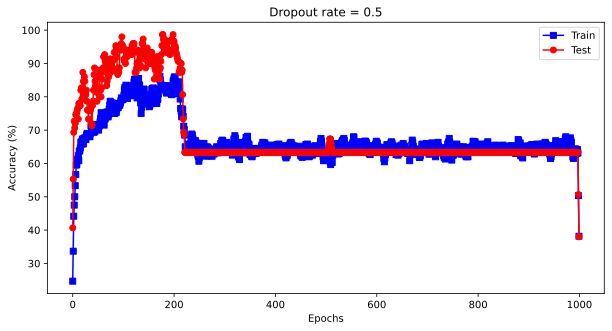

In [44]:
# plot the results
fig = plt.figure(figsize=(10,5))

plt.plot(smooth(train_acc),'bs-')
plt.plot(smooth(test_acc),'ro-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(['Train','Test'])
plt.title('Dropout rate = %g'%dropoutRate)

plt.show()

In [45]:
# run an experiment (note: takes ~3.5 mins)

dropoutRates = np.arange(10)/10
results = np.zeros((len(dropoutRates),2))

for di in range(len(dropoutRates)):
    # create and train the model
    ANNQC,lossfun,optimizer = createModel(dropoutRates[di])
    trainAcc,testAcc = trainModel(ANNQC, lossfun, optimizer)

    # store accuracies from last 100 epochs
    results[di,0] = np.mean(trainAcc[-100:])
    results[di,1] = np.mean(testAcc[-100:])


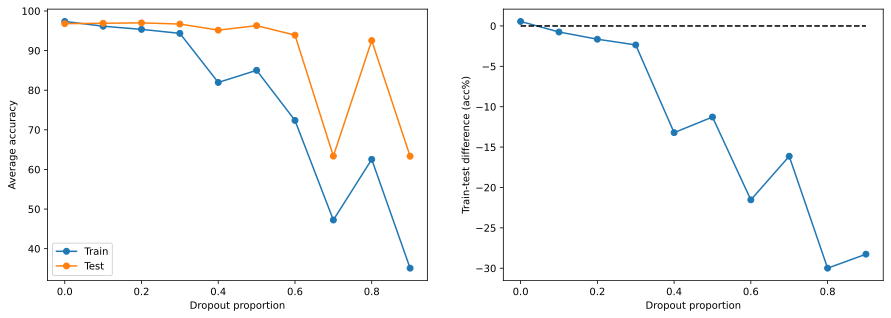

In [46]:
# plot the experiment results
fig,ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot(dropoutRates,results,'o-')
ax[0].set_xlabel('Dropout proportion')
ax[0].set_ylabel('Average accuracy')
ax[0].legend(['Train','Test'])

ax[1].plot(dropoutRates,-np.diff(results,axis=1),'o-')
ax[1].plot([0,.9],[0,0],'k--')
ax[1].set_xlabel('Dropout proportion')
ax[1].set_ylabel('Train-test difference (acc%)')

plt.show()